In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
df = pd.read_csv('/content/Sales_Ettara.csv')

<ipython-input-3-108cd66ffbe0>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,13,14,15,17,18,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Sales_Ettara.csv')


In [ ]:
df.head()

,Date,Timestamp,Invoice No.,Payment Type,Order Type,Area,Item Name,Price,Qty.,Sub Total,...,Address,GST,Assign To,Non Taxable,SGST Rate,SGST Amount,CGST Rate,CGST Amount,Service Charge Rate,Service Charge Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1.0,285.71,...,NaN,NaN,NaN,0.0,2.5,3.52,2.5,3.52,10.0,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1.0,214.29,...,NaN,NaN,NaN,0.0,2.5,5.36,2.5,5.36,10.0,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1.0,85.71,...,NaN,NaN,NaN,0.0,2.5,2.14,2.5,2.14,10.0,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1.0,66.67,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,1.67,2.5,1.67,10.0,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1.0,285.71,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,7.14,2.5,7.14,10.0,28.57


In [ ]:
df1 = df[['Date', 'Timestamp', 'Item Name', 'Price', 'Discount']]
df1.head()

,Date,Timestamp,Item Name,Price,Discount
0,2024-01-28,2024-01-29 02:25:22,ORANGE JUICE,285.71,145.0
1,2024-01-28,2024-01-29 02:17:11,Iced Latte (350 ML),214.29,0.0
2,2024-01-28,2024-01-29 02:17:11,ALMOND MILK (200 ML),85.71,0.0
3,2024-01-28,2024-01-29 02:11:30,Chicken Calzone,66.67,0.0
4,2024-01-28,2024-01-29 02:11:30,Coconut Nankhatai (with Egg),285.71,0.0


In [ ]:
missing_values = df1['Price'].isnull().sum()
print("Number of missing values in 'Price' column:", missing_values)

non_float_values = df1[~df1['Price'].apply(lambda x: isinstance(x, (float, np.float64)))]['Price']
print("Non-float values in 'Price' column:", non_float_values)


Number of missing values in 'Price' column: 18921
Non-float values in 'Price' column: Series([], Name: Price, dtype: float64)


In [ ]:
df1.dropna(subset=['Price'], inplace=True)

<ipython-input-11-6aa049742fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['Price'], inplace=True)


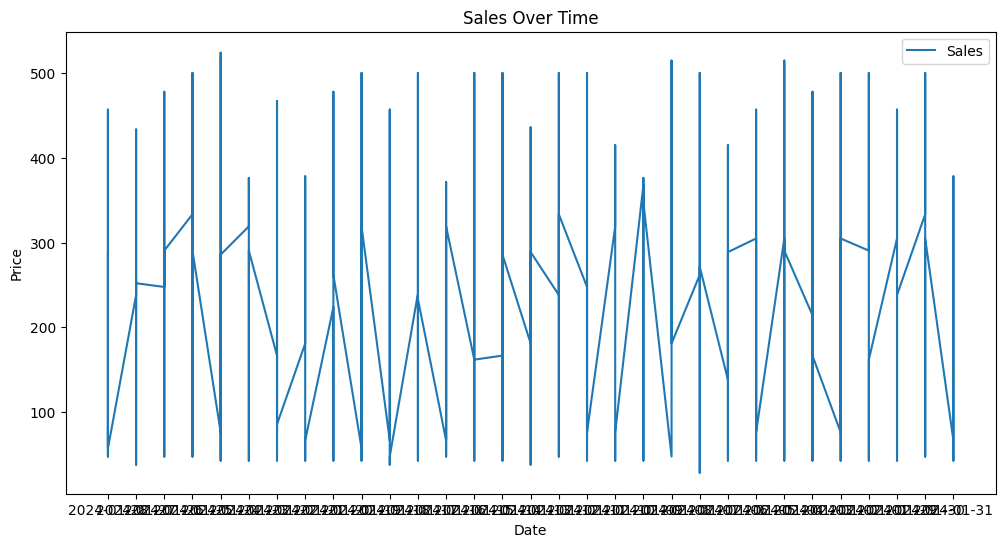

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Price'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

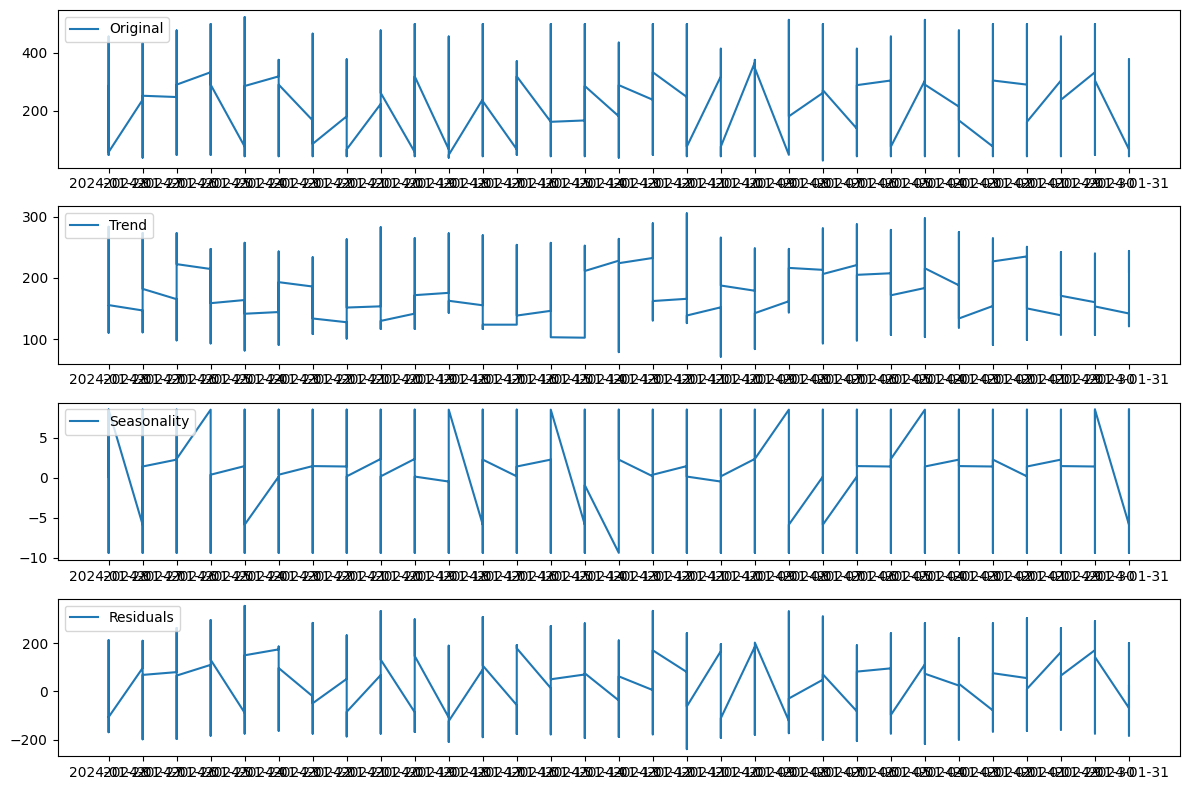

In [ ]:

# Seasonality analysis using seasonal decomposition
decomposition = seasonal_decompose(df1['Price'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df1.index, df1['Price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df1.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df1.index, seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df1.index, residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [29]:
import pandas as pd

df1['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week from the 'Date' column
df1['Day_of_Week'] = df1['Date'].dt.dayofweek

# Define extended weekends (e.g., Friday, Saturday, Sunday)
extended_weekend_days = [4, 5, 6]  # 0 is Monday, 1 is Tuesday, ..., 6 is Sunday

# Filter DataFrame for extended weekends
reduced_activity_intervals = df1[df1['Day_of_Week'].isin(extended_weekend_days)]

# Step 2: Analyze purchase data for targeted seasonal promotions
# Group by 'Item Name' and calculate total sales and average discount
item_purchase_analysis = df1.groupby('Item Name').agg({'Price': 'sum', 'Discount': 'mean'}).reset_index()

# Sort items by total sales in descending order
item_purchase_analysis = item_purchase_analysis.sort_values(by='Price', ascending=False)


<ipython-input-29-1a6850adfea2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df['Date'])
<ipython-input-29-1a6850adfea2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day_of_Week'] = df1['Date'].dt.dayofweek


In [36]:

# Print or visualize the results
print("Intervals with Reduced Transaction Activity (Extended Weekends):")
print(reduced_activity_intervals)
reduced_activity_intervals.to_csv('reduced_activity_intervals.csv', index=False)

Intervals with Reduced Transaction Activity (Extended Weekends):
           Date            Timestamp                               Item Name  \
0    2024-01-28  2024-01-29 02:25:22                            ORANGE JUICE   
1    2024-01-28  2024-01-29 02:17:11                     Iced Latte (350 ML)   
2    2024-01-28  2024-01-29 02:17:11                    ALMOND MILK (200 ML)   
3    2024-01-28  2024-01-29 02:11:30                         Chicken Calzone   
4    2024-01-28  2024-01-29 02:11:30            Coconut Nankhatai (with Egg)   
...         ...                  ...                                     ...   
4977 2024-01-05  2024-01-05 04:21:13                  Hot Chocolate (250 ML)   
4978 2024-01-05  2024-01-05 03:29:59                         Baked Pav Bhaji   
4979 2024-01-05  2024-01-05 03:28:04                       Papparoti (Plain)   
4980 2024-01-05  2024-01-05 03:28:04                          Baked Vada Pav   
4981 2024-01-05  2024-01-05 03:28:04  Berliners (Dark C

In [35]:
print("\nPurchase Analysis for Targeted Seasonal Promotions:")
print(item_purchase_analysis)
item_purchase_analysis.to_csv('item_purchase_analysis.csv', index=False)


Purchase Analysis for Targeted Seasonal Promotions:
                                      Item Name     Price   Discount
149       Origanal South Indian Frappe (350 ML)  68295.88   8.472149
50                           Cappucino (250 ML)  48038.80   2.025318
169          South Indian Filter Kaapi (150 ML)  45294.50   0.401420
183                         Vietnamese (350 ML)  45000.39  10.036797
170          South Indian Filter Kaapi (250 ML)  44114.05   3.544156
..                                          ...       ...        ...
137     Mix Tartlet 9 Pcs (Kacha Nimbu Tartlet)     28.57   0.000000
138  Mix Tartlet 9 Pcs (Salted Caramel Tartlet)     28.57   0.000000
139       Mix Tartlet 9 Pcs (chocolate Tartlet)     28.57   0.000000
140    Mix Tartlet 9 Pcs (kodai cheese tartlet)     28.57   0.000000
136    Mix Tartlet 9 Pcs (Filter Kaapi Tartlet)     28.57   0.000000

[192 rows x 3 columns]


In [33]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Hour_of_Day'] = df['Timestamp'].dt.hour

average_sales_by_time = df.groupby(['Day_of_Week', 'Hour_of_Day']).agg({'Price': 'mean'}).reset_index()

threshold_percentage = 0.7  # Adjust this value based on your preference
average_sales = df['Price'].mean()
threshold = average_sales * threshold_percentage

# Identify periods with lower expected sales
low_traffic_periods = average_sales_by_time[average_sales_by_time['Price'] < threshold]

# Save low-traffic periods to a CSV file
low_traffic_periods.to_csv('low_traffic_periods.csv', index=False)

print("Low-Traffic Periods:")
print(low_traffic_periods)

Low-Traffic Periods:
     Day_of_Week  Hour_of_Day       Price
10           0.0         10.0  130.477000
37           1.0         14.0  119.703448
52           2.0          5.0   72.000000
53           2.0          6.0   73.810000
78           3.0          7.0  121.430000
129          5.0         10.0  123.810000
150          6.0          7.0  104.764000
